# Data Load

In [11]:
import pandas as pd

df = pd.read_csv('data/BTC-USD.csv')
df['Future Close'] = df['Close'].shift(-1)
df['Target'] = df.apply(lambda row: 1 if row['Future Close'] > row['Close'] else 0, axis=1)
df = df.dropna()

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Future Close,Target
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,424.440002,0
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,394.795990,0
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,408.903992,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,398.821014,0
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,402.152008,1
...,...,...,...,...,...,...,...,...,...
2741,2022-03-20,42191.406250,42241.164063,41004.757813,41247.824219,41247.824219,20127946682,41077.996094,0
2742,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271,42358.808594,1
2743,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376,42892.957031,1
2744,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069,43960.933594,1


In [8]:
df['Target'].value_counts()

Target
1    1486
0    1260
Name: count, dtype: int64

<Axes: >

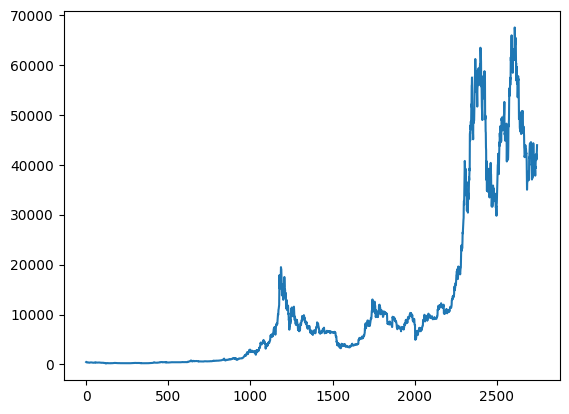

In [9]:
df['Close'].plot()

# Data Preparation

In [10]:
from sklearn.preprocessing import MinMaxScaler

features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target = df['Target']
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)